## Semiclassical Optomechanics

Solves the semiclassical equations of motion for a coupled field mode and mechanical DOF 
$$ \dot{\alpha} = -\kappa/2 \alpha + i(\Delta + Gx) \alpha + \sqrt{\kappa_{ex}} \alpha_{in}  $$
$$m_{eff} \ddot{x} = -m_{eff} \Omega_m^2 x - m_{eff} \gamma_{m} \dot{x} + \hbar G |\alpha|^2 $$
from (Aspelmeyer, Rev. Mod. Phys.. Vol. 86 No. 4 2011)

In [22]:
%matplotlib inline
import scipy.integrate as sp
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
hbar = 1

In [218]:
%%capture
def vec_field(vars, t, params):
    g, meff, omegam, gamma, G, kappa, kappaex, delta, ain = params
    q, x, alpha = vars
    return [-meff*omegam**2*x - meff*gamma*q+hbar*G*alpha**2, 
            q, -kappa*alpha + 1j*(
                delta+g*x)*alpha + np.sqrt(kappaex)*ain]

g=100
meff=1
omegam=1
gamma=1
G=1
kappa=1
kappaex=1
delta=0
ain=10

params = [g, meff, omegam, gamma, G, kappa, kappaex, delta, ain]
initial_vars = [0, 0, 0]
t = np.linspace(1, 40, 100)
sol = sp.odeint(vec_field, initial_vars, t, args=(params,))

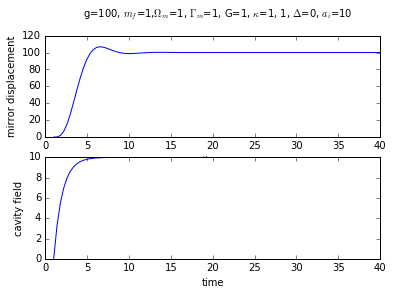

In [220]:
fig, ax = plt.subplots(2, 1)
fig.suptitle(
    'g={0}, $m_f$={1},$\Omega_m$={2}, $\Gamma_m$={3}, G={4}, $\kappa$={5}, {6}, $\Delta$={7}, $a_i$={8} \
    '.format(*params), x=0.54, y=0.999)
ax[0].plot(t, sol[:, 1])
ax[0].set_xlabel('time')
ax[0].set_ylabel('mirror displacement')
ax[1].plot(t, sol[:, 2])
ax[1].set_xlabel('time')
ax[1].set_ylabel('cavity field')